# Logistic Regression

In this file we implement the single neuron logistic regression model and use to to classify...

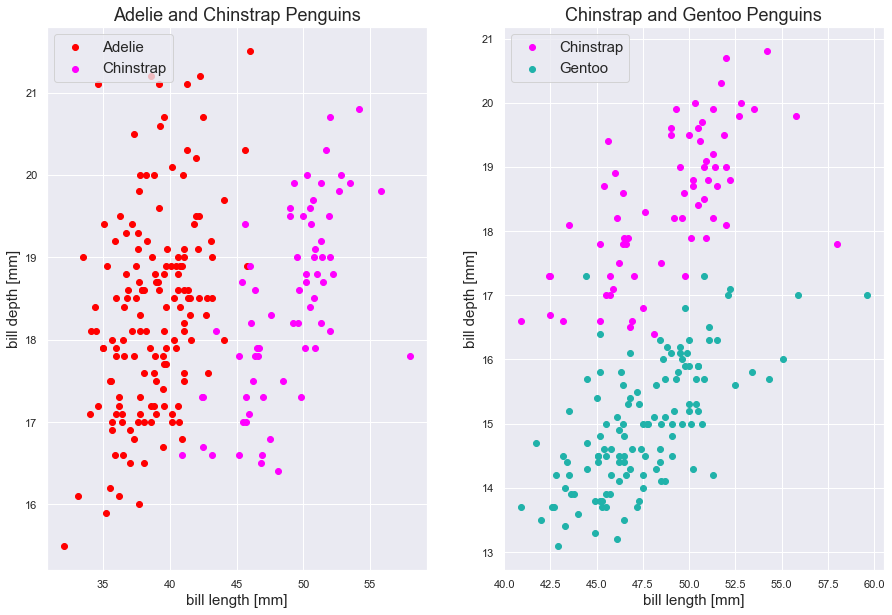

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn
df = sns.load_dataset("penguins")

Adelie = df[df.species == "Adelie"]
Chinstrap = df[df.species == "Chinstrap"]
Gentoo = df[df.species == "Gentoo"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "red", 
            label = "Adelie")
ax1.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
ax1.set_xlabel("bill length [mm]", fontsize = 15)
ax1.set_ylabel("bill depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Adelie and Chinstrap Penguins", fontsize = 18)


ax2.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
ax2.scatter(Gentoo.bill_length_mm, 
            Gentoo.bill_depth_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
ax2.set_xlabel("bill length [mm]", fontsize = 15)
ax2.set_ylabel("bill depth [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Chinstrap and Gentoo Penguins", fontsize = 18)
plt.show()

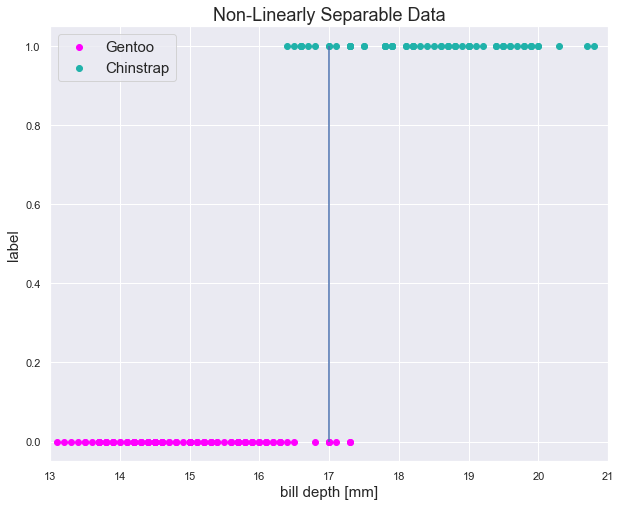

In [75]:
plt.figure(figsize = (10, 8))
plt.xlim((13, 21))
plt.scatter(Gentoo.bill_depth_mm, 
            np.zeros(124), 
            color = "magenta", 
            label = "Gentoo")
plt.scatter(Chinstrap.bill_depth_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
plt.vlines(17, 0.0, 1.0)
plt.xlabel("bill depth [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Separable Data", fontsize = 18)
plt.show()

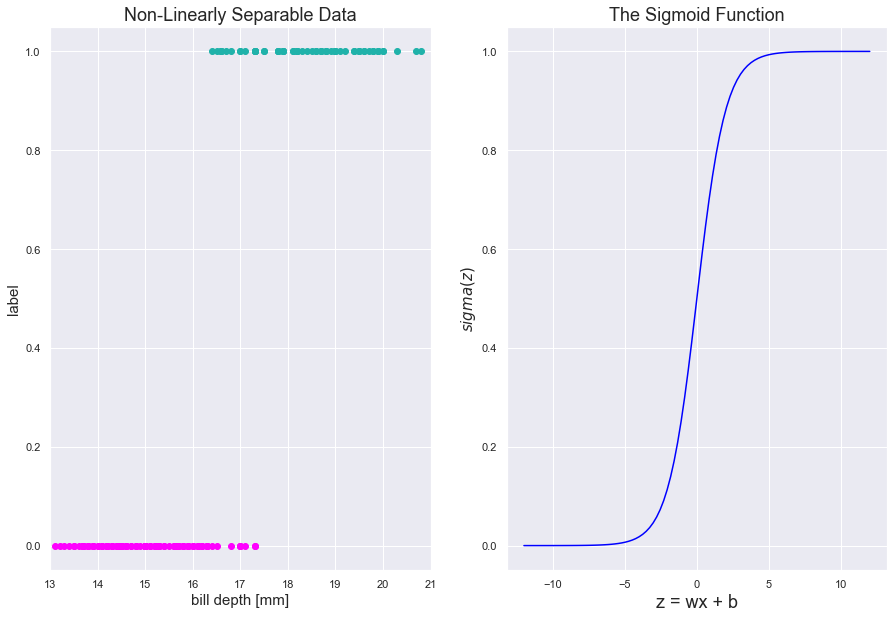

In [12]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((13, 21))
ax1.scatter(Gentoo.bill_depth_mm, 
            np.zeros(124), 
            color = "magenta", 
            label = "Gentoo")
ax1.scatter(Chinstrap.bill_depth_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")
ax1.set_xlabel("bill depth [mm]", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Separable Data", fontsize = 18)

domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [13]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [94]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.iloc[154:].bill_depth_mm.values
X = X.reshape(-1, 1)
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(df.iloc[154:].species == "Gentoo", 0, 1)
y = np.delete(y, 185)

node.train(X, y, alpha = 0.005, epochs = 10_000)

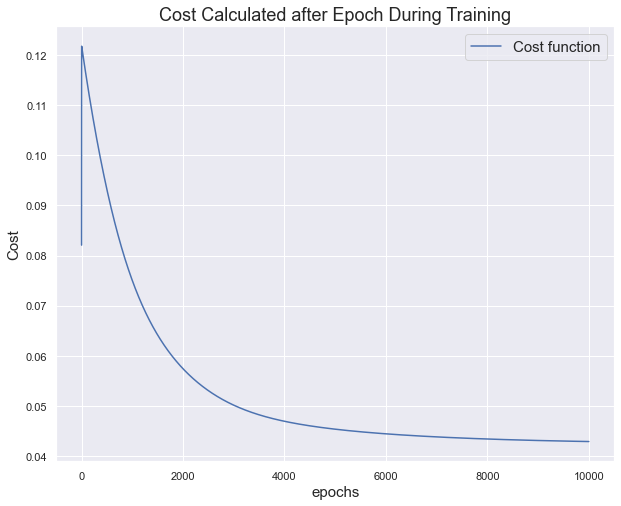

In [95]:
node.plot_cost_function()
plt.show()

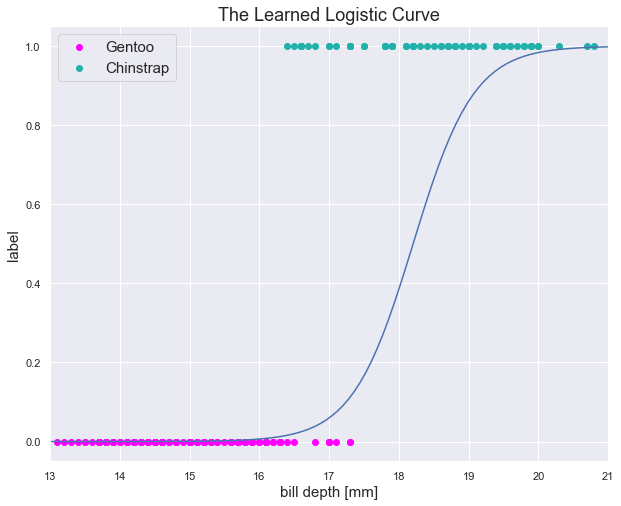

In [96]:
plt.figure(figsize = (10, 8))
plt.xlim((13, 21))
plt.scatter(Gentoo.bill_depth_mm, 
            np.zeros(124), 
            color = "magenta", 
            label = "Gentoo")
plt.scatter(Chinstrap.bill_depth_mm, 
            np.ones(68), 
            color = "lightseagreen", 
            label = "Chinstrap")

domain = np.linspace(13, 21, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("bill depth [mm]", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [97]:
node.predict(X)

array([9.07153434e-01, 7.56639104e-01, 9.74750869e-01, 2.83594802e-01,
       4.97329643e-01, 4.97329643e-01, 8.30946454e-01, 9.79814420e-01,
       2.83594802e-01, 9.91824567e-01, 1.11875839e-01, 4.40363730e-01,
       7.38000425e-02, 9.60660094e-01, 9.83879302e-01, 2.83594802e-01,
       7.12044899e-01, 4.97329643e-01, 1.11875839e-01, 1.66073763e-01,
       2.47286499e-02, 9.39196209e-01, 3.32323479e-01, 8.60728557e-01,
       6.10003621e-01, 8.60728557e-01, 2.83594802e-01, 9.83879302e-01,
       2.47286499e-02, 9.97383858e-01, 3.08958933e-02, 7.96302870e-01,
       7.12044899e-01, 3.85404450e-02, 5.54364968e-01, 9.96712813e-01,
       2.47286499e-02, 9.79814420e-01, 9.51031817e-01, 1.66073763e-01,
       8.85983870e-01, 5.95952036e-02, 3.32323479e-01, 6.62919529e-01,
       3.32323479e-01, 9.60660094e-01, 7.56639104e-01, 1.11875839e-01,
       1.57853422e-02, 8.60728557e-01, 1.11875839e-01, 9.68458018e-01,
       1.11875839e-01, 7.96302870e-01, 2.47286499e-02, 9.79814420e-01,
      

In [98]:
np.rint(node.predict(X)) != y

array([False, False, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False, False,  True, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [99]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.164021164021164


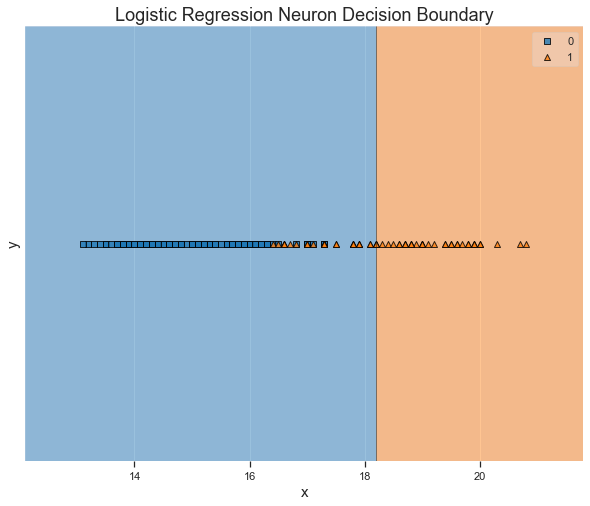

In [100]:
node.plot_decision_boundary(X, y)
plt.show()

/var/folders/3h/7r2sywvd7vg7tm_0lf1y8bth0000gn/T/ipykernel_16799/1930204147.py:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/3h/7r2sywvd7vg7tm_0lf1y8bth0000gn/T/ipykernel_16799/1930204147.py:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


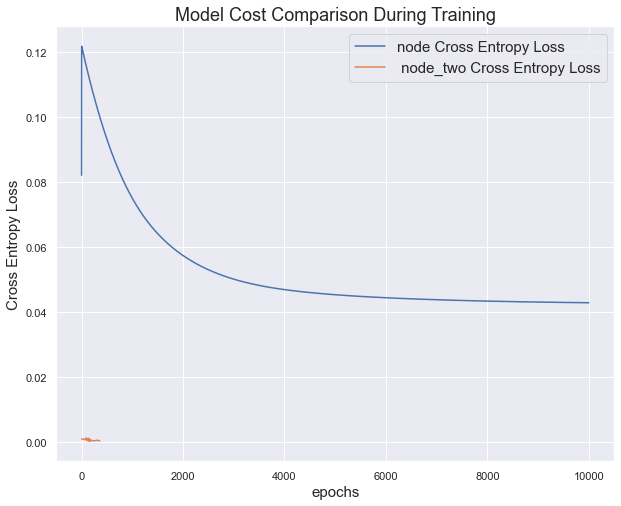

In [108]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df.iloc[154:][["bill_length_mm", "bill_depth_mm"]].values
X_two = X_two[~np.isnan(X_two).any(axis=1)] # removing rows with NaN's

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.005, epochs = 10_000)

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

/var/folders/3h/7r2sywvd7vg7tm_0lf1y8bth0000gn/T/ipykernel_16799/832529427.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-z))


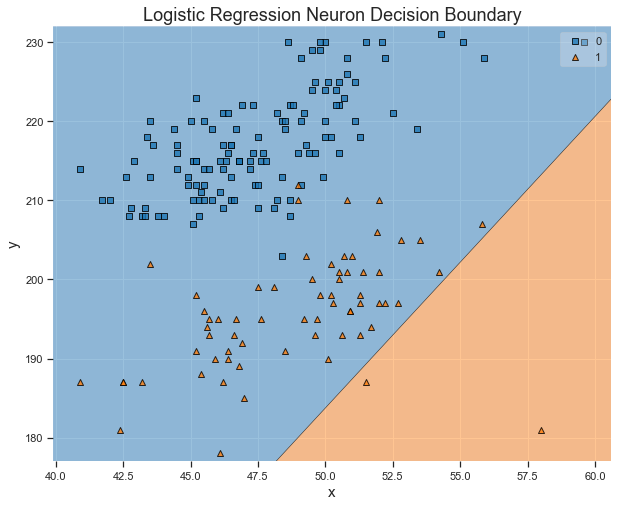

In [107]:
node_two.plot_decision_boundary(X_two, y)